<a href="https://colab.research.google.com/github/shivanibhinge/AgriSense_Data_Driven_Irrigation_Insights/blob/main/ML_Project_AgriSense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import requests, pandas as pd

url_weather = "https://power.larc.nasa.gov/api/temporal/daily/point"
params_weather = {
    "start": "20140101",
    "end": "20251231",
    "latitude": 36.77,       # change coords if you like
    "longitude": -119.41,
    "parameters": "T2M_MAX,T2M_MIN,RH2M,PRECTOT,EVPTRNS",
    "community": "AG",
    "format": "JSON"
}

r1 = requests.get(url_weather, params=params_weather)
data_weather = r1.json()

df_weather = pd.DataFrame.from_dict(data_weather["properties"]["parameter"])
df_weather["date"] = pd.to_datetime(df_weather.index)
df_weather.reset_index(drop=True, inplace=True)
print(df_weather.head())


   T2M_MIN  EVPTRNS   RH2M  T2M_MAX  PRECTOTCORR       date
0     5.80      0.0  33.09    19.54          0.0 2014-01-01
1     8.39      0.0  34.60    19.92          0.0 2014-01-02
2     7.50      0.0  35.66    19.55          0.0 2014-01-03
3     6.59      0.0  34.02    19.05          0.0 2014-01-04
4     4.86      0.0  26.37    19.00          0.0 2014-01-05


In [39]:
df_weather.shape

(4383, 6)

In [46]:
import pandas as pd
import requests
from datetime import datetime, timedelta

def fetch_weatherbit_monthly(lat, lon, start_year, end_year, api_key):
    base_url = "https://api.weatherbit.io/v2.0/history/agweather"
    all_data = []

    for year in range(start_year, end_year + 1):
        for month in range(1, 13):
            start_date = datetime(year, month, 1)
            # compute end of month
            end_date = (start_date + pd.offsets.MonthEnd(1)).date()

            params = {
                "lat": lat,
                "lon": lon,
                "start_date": start_date.strftime("%Y-%m-%d"),
                "end_date": end_date.strftime("%Y-%m-%d"),
                "key": api_key
            }

            try:
                r = requests.get(base_url, params=params, timeout=30)
                data = r.json()

                if "data" in data:
                    df = pd.DataFrame(data["data"])
                    all_data.append(df)
                    print(f"✅ Retrieved {len(df)} rows for {year}-{month:02d}")
                else:
                    print(f"⚠️ No data for {year}-{month:02d}")
            except Exception as e:
                print(f"❌ Error for {year}-{month:02d}: {e}")

    # combine all months
    if all_data:
        df_all = pd.concat(all_data, ignore_index=True)
        df_all["valid_date"] = pd.to_datetime(df_all["valid_date"])
        return df_all
    else:
        return pd.DataFrame()

In [48]:
lat, lon = 36.77, -119.41  # example
api_key = "3fb5ca091d184fddbab58702fda76c99"

df_soil = fetch_weatherbit_monthly(lat, lon, 2020, 2023, api_key)
print(df_soil.shape)
df_soil.head()


✅ Retrieved 30 rows for 2020-01
✅ Retrieved 28 rows for 2020-02
✅ Retrieved 30 rows for 2020-03
✅ Retrieved 29 rows for 2020-04
✅ Retrieved 30 rows for 2020-05
✅ Retrieved 29 rows for 2020-06
✅ Retrieved 30 rows for 2020-07
✅ Retrieved 30 rows for 2020-08
✅ Retrieved 29 rows for 2020-09
✅ Retrieved 30 rows for 2020-10
✅ Retrieved 29 rows for 2020-11
✅ Retrieved 30 rows for 2020-12
✅ Retrieved 30 rows for 2021-01
✅ Retrieved 27 rows for 2021-02
✅ Retrieved 30 rows for 2021-03
✅ Retrieved 29 rows for 2021-04
✅ Retrieved 30 rows for 2021-05
✅ Retrieved 29 rows for 2021-06
✅ Retrieved 30 rows for 2021-07
✅ Retrieved 30 rows for 2021-08
✅ Retrieved 29 rows for 2021-09
✅ Retrieved 30 rows for 2021-10
✅ Retrieved 29 rows for 2021-11
✅ Retrieved 30 rows for 2021-12
✅ Retrieved 30 rows for 2022-01
✅ Retrieved 27 rows for 2022-02
✅ Retrieved 30 rows for 2022-03
✅ Retrieved 29 rows for 2022-04
✅ Retrieved 30 rows for 2022-05
✅ Retrieved 29 rows for 2022-06
✅ Retrieved 30 rows for 2022-07
✅ Retrie

,bulk_soil_density,dlwrf_avg,dlwrf_max,dlwrf_net,dswrf_avg,dswrf_max,dswrf_net,evapotranspiration,precip,pres_avg,...,specific_humidity,temp_2m_avg,timestamp_local,timestamp_utc,v_soilm_0_10cm,v_soilm_100_200cm,v_soilm_10_40cm,v_soilm_40_100cm,valid_date,wind_10m_spd_avg
0,1520,17.08,70,17.08,113.75,465,-113.75,1.52,0.0,999.8,...,0.00537,9.4,2020-01-01T00:00:00,2020-01-01T00:00:00,0.334,0.263,0.335,0.249,2020-01-01,1.3
1,1520,13.33,50,13.33,83.33,315,-83.33,0.87,0.0,1000.1,...,0.00600,8.4,2020-01-02T00:00:00,2020-01-02T00:00:00,0.329,0.263,0.331,0.249,2020-01-02,1.0
2,1520,19.17,75,19.17,119.58,505,-119.58,1.73,0.0,1004.0,...,0.00543,10.0,2020-01-03T00:00:00,2020-01-03T00:00:00,0.326,0.263,0.327,0.249,2020-01-03,0.8
3,1520,19.58,80,19.58,126.67,520,-126.67,2.00,0.0,1007.2,...,0.00539,10.8,2020-01-04T00:00:00,2020-01-04T00:00:00,0.318,0.263,0.320,0.247,2020-01-04,1.7
4,1520,17.92,70,17.92,118.75,455,-118.75,1.61,0.0,1011.3,...,0.00544,9.2,2020-01-05T00:00:00,2020-01-05T00:00:00,0.310,0.263,0.315,0.245,2020-01-05,2.1


In [49]:
df_soil.shape

(1117, 33)

In [50]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   T2M_MIN      4383 non-null   float64       
 1   EVPTRNS      4383 non-null   float64       
 2   RH2M         4383 non-null   float64       
 3   T2M_MAX      4383 non-null   float64       
 4   PRECTOTCORR  4383 non-null   float64       
 5   date         4383 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 205.6 KB


In [51]:
df_weather.describe()

,T2M_MIN,EVPTRNS,RH2M,T2M_MAX,PRECTOTCORR,date
count,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383
mean,9.310917,0.549596,47.250666,22.197782,1.510281,2020-01-01 00:00:00.000000256
min,-10.630000,0.000000,8.070000,-0.300000,0.000000,2014-01-01 00:00:00
25%,3.655000,0.000000,28.570000,15.060000,0.000000,2016-12-31 12:00:00
50%,8.490000,0.060000,44.970000,21.930000,0.000000,2020-01-01 00:00:00
75%,15.540000,0.500000,63.475000,30.270000,0.090000,2022-12-31 12:00:00
max,26.360000,7.620000,100.000000,42.260000,89.310000,2025-12-31 00:00:00
std,7.225119,1.087574,21.883553,9.238221,5.856734,NaN


In [52]:
df_weather.shape

(4383, 6)

In [53]:
df_weather.isnull().sum()

,0
T2M_MIN,0
EVPTRNS,0
RH2M,0
T2M_MAX,0
PRECTOTCORR,0
date,0


In [54]:
df_agweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bulk_soil_density   6 non-null      int64         
 1   dlwrf_avg           6 non-null      float64       
 2   dlwrf_max           6 non-null      int64         
 3   dlwrf_net           6 non-null      float64       
 4   dswrf_avg           6 non-null      float64       
 5   dswrf_max           6 non-null      int64         
 6   dswrf_net           6 non-null      float64       
 7   evapotranspiration  6 non-null      float64       
 8   precip              6 non-null      float64       
 9   pres_avg            6 non-null      float64       
 10  revision_status     6 non-null      object        
 11  revision_version    6 non-null      object        
 12  skin_temp_avg       6 non-null      float64       
 13  skin_temp_max       6 non-null      float64       
 14

In [55]:
df_agweather.shape

(6, 33)

In [31]:
df_merged.shape

(6, 39)

In [9]:
df_agweather.head()

,bulk_soil_density,dlwrf_avg,dlwrf_max,dlwrf_net,dswrf_avg,dswrf_max,dswrf_net,evapotranspiration,precip,pres_avg,...,specific_humidity,temp_2m_avg,timestamp_local,timestamp_utc,v_soilm_0_10cm,v_soilm_100_200cm,v_soilm_10_40cm,v_soilm_40_100cm,valid_date,wind_10m_spd_avg
0,1520,11.67,50,11.67,76.25,360,-76.25,0.91,11.75,989.1,...,0.00628,10.1,2023-01-01T00:00:00,2023-01-01T00:00:00,0.421,0.204,0.422,0.291,2023-01-01,1.9
1,1520,10.42,45,10.42,68.33,280,-68.33,0.80,5.50,994.3,...,0.00528,7.8,2023-01-02T00:00:00,2023-01-02T00:00:00,0.401,0.204,0.402,0.300,2023-01-02,2.0
2,1520,14.58,65,14.58,95.42,425,-95.42,1.22,0.00,996.3,...,0.00599,9.7,2023-01-03T00:00:00,2023-01-03T00:00:00,0.405,0.204,0.406,0.305,2023-01-03,1.4
3,1520,7.92,40,7.92,47.50,240,-47.50,1.18,10.50,993.6,...,0.00606,12.1,2023-01-04T00:00:00,2023-01-04T00:00:00,0.388,0.204,0.392,0.310,2023-01-04,2.9
4,1520,6.67,35,6.67,40.00,200,-40.00,0.59,21.00,996.0,...,0.00736,12.3,2023-01-05T00:00:00,2023-01-05T00:00:00,0.431,0.205,0.423,0.320,2023-01-05,3.4


In [56]:
import pandas as pd

# load your dataframes (if not already)
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_soil['valid_date'] = pd.to_datetime(df_soil['valid_date'])

# merge
df_merged = pd.merge(df_weather, df_soil, left_on='date', right_on='valid_date', how='inner')

# drop redundant column
df_merged.drop(columns=['valid_date'], inplace=True)

# handle missing values
df_merged = df_merged.fillna(method='ffill')

print(df_merged.head())
print("Merged shape:", df_merged.shape)

# save for later
df_merged.to_csv("merged_smart_water.csv", index=False)


   T2M_MIN  EVPTRNS   RH2M  T2M_MAX  PRECTOTCORR       date  \
0     3.05     0.48  65.03    13.60         0.10 2020-01-01   
1     2.89     0.64  63.18    15.37         0.03 2020-01-02   
2     4.78     0.70  51.74    17.73         0.00 2020-01-03   
3     3.98     0.53  48.59    14.17         0.00 2020-01-04   
4     2.61     0.48  51.75    11.72         0.00 2020-01-05   

   bulk_soil_density  dlwrf_avg  dlwrf_max  dlwrf_net  ...  soilt_40_100cm  \
0               1520      17.08         70      17.08  ...            10.4   
1               1520      13.33         50      13.33  ...            10.4   
2               1520      19.17         75      19.17  ...            10.4   
3               1520      19.58         80      19.58  ...            10.4   
4               1520      17.92         70      17.92  ...            10.4   

   specific_humidity  temp_2m_avg      timestamp_local        timestamp_utc  \
0            0.00537          9.4  2020-01-01T00:00:00  2020-01-01T00:00:

/tmp/ipython-input-2835202356.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged = df_merged.fillna(method='ffill')


In [57]:
df_merged.head()

,T2M_MIN,EVPTRNS,RH2M,T2M_MAX,PRECTOTCORR,date,bulk_soil_density,dlwrf_avg,dlwrf_max,dlwrf_net,...,soilt_40_100cm,specific_humidity,temp_2m_avg,timestamp_local,timestamp_utc,v_soilm_0_10cm,v_soilm_100_200cm,v_soilm_10_40cm,v_soilm_40_100cm,wind_10m_spd_avg
0,3.05,0.48,65.03,13.60,0.10,2020-01-01,1520,17.08,70,17.08,...,10.4,0.00537,9.4,2020-01-01T00:00:00,2020-01-01T00:00:00,0.334,0.263,0.335,0.249,1.3
1,2.89,0.64,63.18,15.37,0.03,2020-01-02,1520,13.33,50,13.33,...,10.4,0.00600,8.4,2020-01-02T00:00:00,2020-01-02T00:00:00,0.329,0.263,0.331,0.249,1.0
2,4.78,0.70,51.74,17.73,0.00,2020-01-03,1520,19.17,75,19.17,...,10.4,0.00543,10.0,2020-01-03T00:00:00,2020-01-03T00:00:00,0.326,0.263,0.327,0.249,0.8
3,3.98,0.53,48.59,14.17,0.00,2020-01-04,1520,19.58,80,19.58,...,10.4,0.00539,10.8,2020-01-04T00:00:00,2020-01-04T00:00:00,0.318,0.263,0.320,0.247,1.7
4,2.61,0.48,51.75,11.72,0.00,2020-01-05,1520,17.92,70,17.92,...,10.4,0.00544,9.2,2020-01-05T00:00:00,2020-01-05T00:00:00,0.310,0.263,0.315,0.245,2.1


In [58]:
df_merged.shape

(1117, 38)

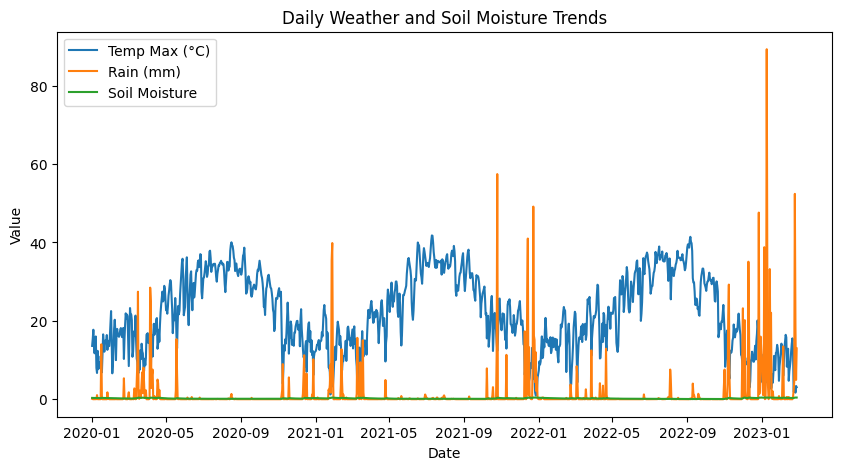

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Temperature, precipitation, soil moisture over time
plt.figure(figsize=(10,5))
plt.plot(df_merged['date'], df_merged['T2M_MAX'], label='Temp Max (°C)')
plt.plot(df_merged['date'], df_merged['PRECTOTCORR'], label='Rain (mm)')
plt.plot(df_merged['date'], df_merged['v_soilm_0_10cm'], label='Soil Moisture')
plt.legend()
plt.title('Daily Weather and Soil Moisture Trends')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

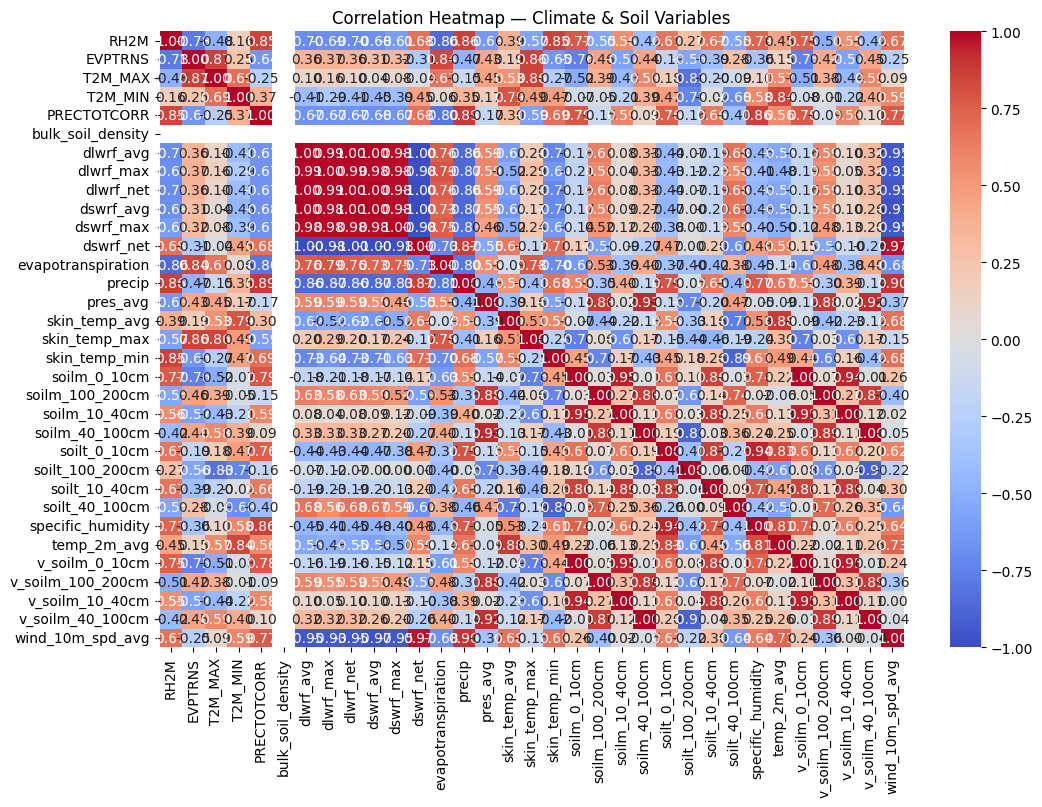

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
num_df = df_merged.select_dtypes(include='number')

plt.figure(figsize=(12,8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap — Climate & Soil Variables")
plt.show()


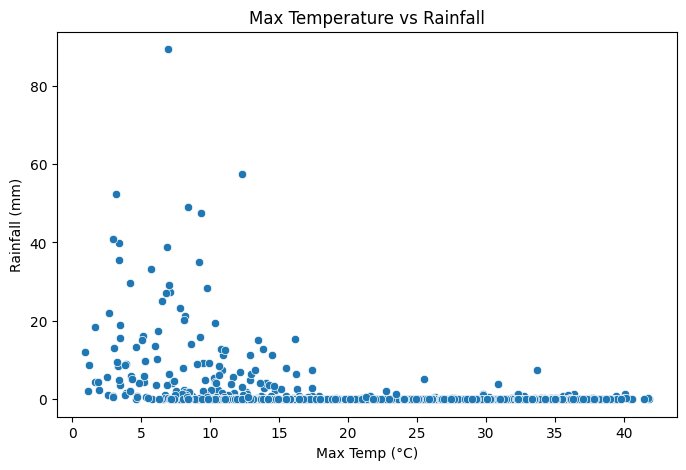

In [61]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='T2M_MAX', y='PRECTOTCORR', data=df_merged)
plt.title('Max Temperature vs Rainfall')
plt.xlabel('Max Temp (°C)')
plt.ylabel('Rainfall (mm)')
plt.show()


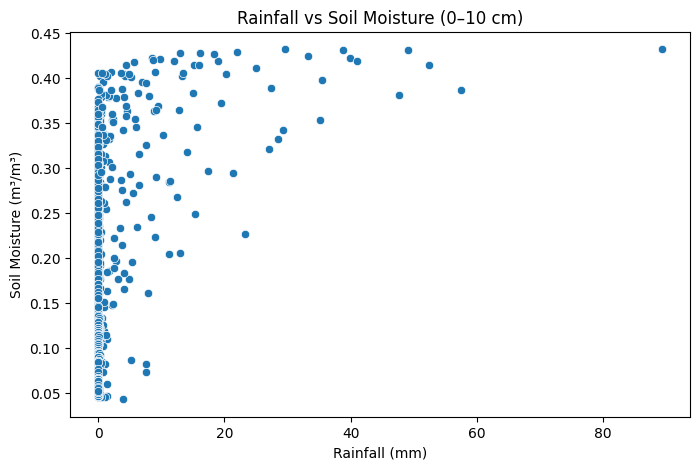

In [62]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='PRECTOTCORR', y='v_soilm_0_10cm', data=df_merged)
plt.title('Rainfall vs Soil Moisture (0–10 cm)')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Soil Moisture (m³/m³)')
plt.show()

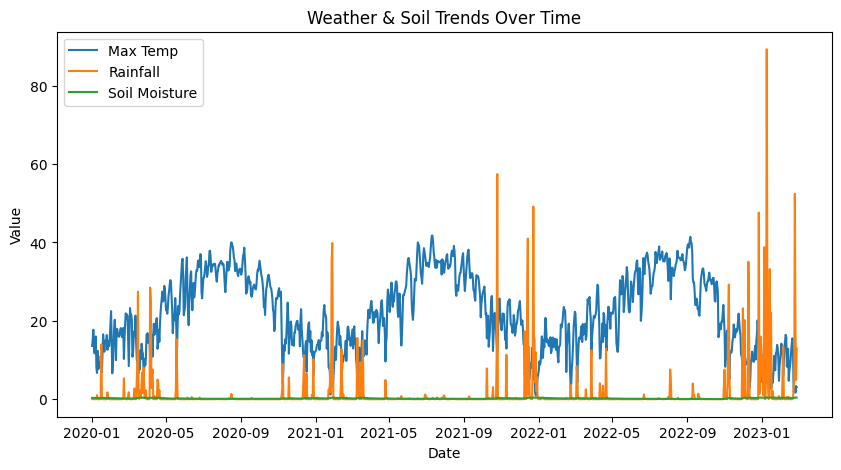

In [63]:
plt.figure(figsize=(10,5))
plt.plot(df_merged['date'], df_merged['T2M_MAX'], label='Max Temp')
plt.plot(df_merged['date'], df_merged['PRECTOTCORR'], label='Rainfall')
plt.plot(df_merged['date'], df_merged['v_soilm_0_10cm'], label='Soil Moisture')
plt.legend()
plt.title('Weather & Soil Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

/tmp/ipython-input-103482435.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='v_soilm_0_10cm', data=df_merged, palette='viridis')


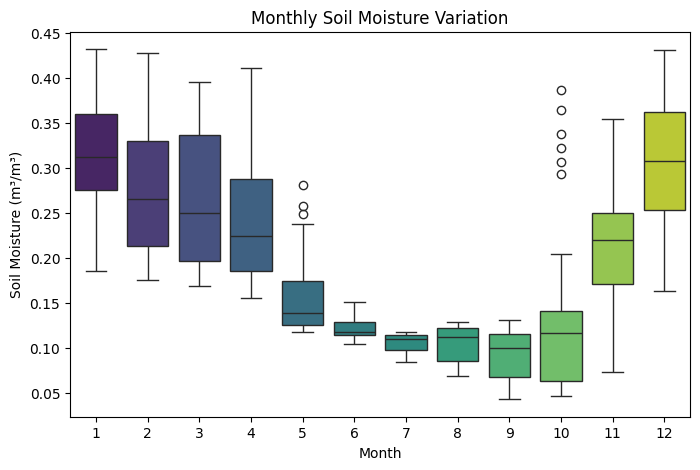

In [64]:
df_merged['month'] = df_merged['date'].dt.month
plt.figure(figsize=(8,5))
sns.boxplot(x='month', y='v_soilm_0_10cm', data=df_merged, palette='viridis')
plt.title('Monthly Soil Moisture Variation')
plt.xlabel('Month')
plt.ylabel('Soil Moisture (m³/m³)')
plt.show()

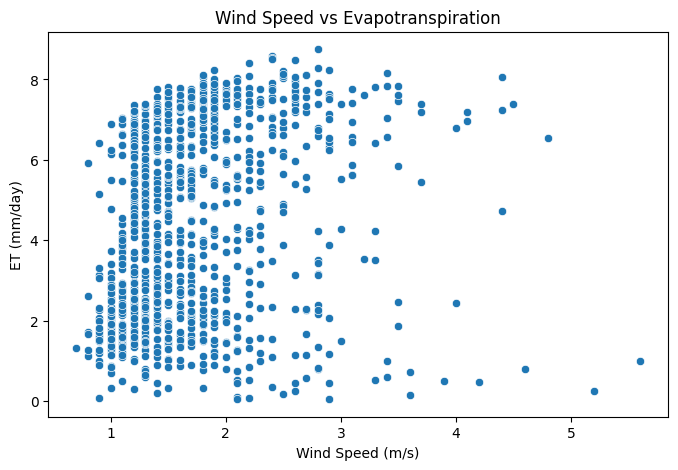

In [65]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='wind_10m_spd_avg', y='evapotranspiration', data=df_merged)
plt.title('Wind Speed vs Evapotranspiration')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('ET (mm/day)')
plt.show()

/tmp/ipython-input-2980516566.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='evapotranspiration', data=et_month, palette='crest')


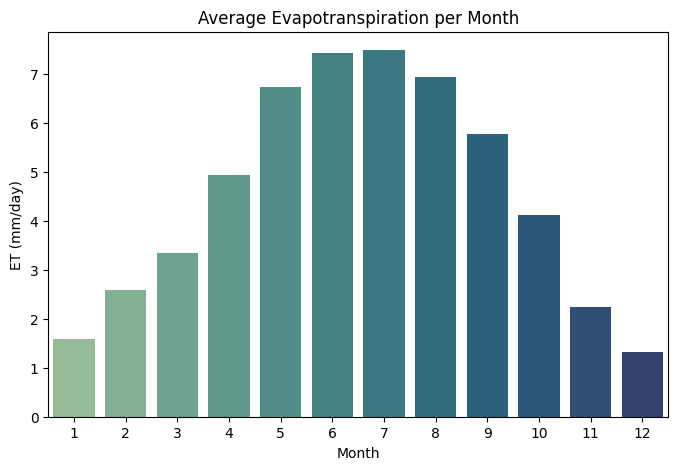

In [66]:
et_month = df_merged.groupby('month')['evapotranspiration'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='month', y='evapotranspiration', data=et_month, palette='crest')
plt.title('Average Evapotranspiration per Month')
plt.xlabel('Month')
plt.ylabel('ET (mm/day)')
plt.show()